In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
cancer = load_breast_cancer()

In [3]:
data = cancer.data
target = cancer.target

In [4]:
names = cancer.feature_names

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=22)

In [7]:
scale = StandardScaler().fit(X_train)

In [8]:
scale_xtrain = scale.transform(X_train)

In [9]:
scale_xtest = scale.transform(X_test)

In [10]:
svm = SVC().fit(scale_xtrain,y_train)

In [11]:
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
svm.predict(scale_xtest[:10])

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [15]:
y_test[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [16]:
target_pred = svm.predict(scale_xtest)

# 分类结果的混淆矩阵与准确率

In [18]:
np.sum(y_test==target_pred)

111

In [21]:
y_test.shape

(114,)

In [22]:
np.sum(y_test==target_pred)/y_test.shape *100

array([97.36842105])

# 分析分类模型常用评价方法

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score

In [25]:
md = [accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score]

In [31]:
for i in md:
    print(str(i.__name__),i(y_test,target_pred))

accuracy_score 0.9736842105263158
precision_score 0.9594594594594594
recall_score 1.0
f1_score 0.9793103448275862
cohen_kappa_score 0.9432082364662903


# 分类模型评价报告

In [32]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,target_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# roc

In [38]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [36]:
fpr,tpr, threadholds = roc_curve(y_test,target_pred)

In [39]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

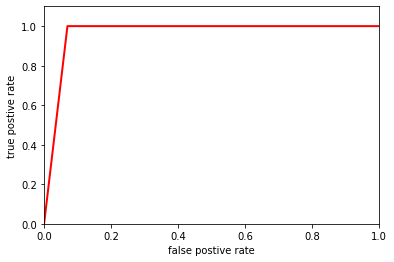

In [45]:
plt.xlim(0,1)
plt.ylim(0.0,1.1)
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.plot(fpr,tpr,linewidth=2,linestyle='-',color='red')

In [47]:
fpr

array([0.        , 0.06976744, 1.        ])

In [48]:
tpr

array([0., 1., 1.])

In [49]:
threadholds

array([2, 1, 0])

## 
- 红线下的面积越大。表示模型的性能越好
